<a href="https://colab.research.google.com/github/MeenaCherukuri/AIML-Internship/blob/main/26_5_25_AIML_Internship_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step1
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")

# View top rows
print("First 5 rows:\n", df.head())

# Basic info: datatypes, non-null counts
print("\nInfo:\n")
print(df.info())

# Null values count
print("\nMissing values:\n")
print(df.isnull().sum())


First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [ ]:
#step2
#Fill 'Age' with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Drop 'Cabin' (too many nulls)
df = df.drop(columns=['Cabin'])

# Drop rows with missing 'Embarked'
df = df.dropna(subset=['Embarked'])


In [ ]:
#step3
# Map 'Sex': male -> 1, female -> 0
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Map 'Embarked': S -> 0, C -> 1, Q -> 2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [ ]:
#step4
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Columns to scale
scale_cols = ['Age', 'Fare']

# Apply scaling
df[scale_cols] = scaler.fit_transform(df[scale_cols])


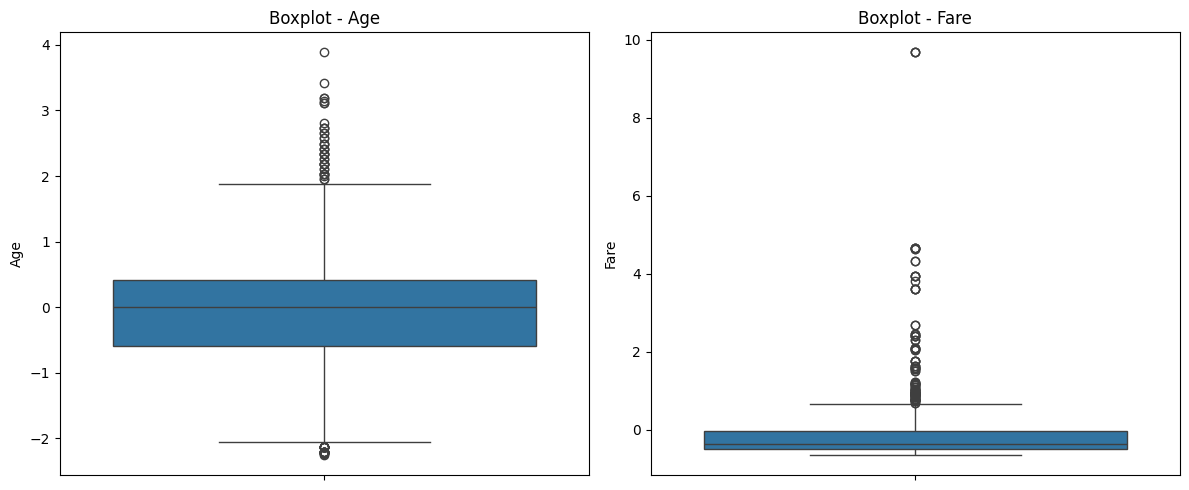

In [ ]:
#step5
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Boxplot - Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title("Boxplot - Fare")

plt.tight_layout()
plt.show()

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')


In [ ]:
#step6
print("Cleaned Data Sample:\n", df.head())
print("\nCleaned Shape:", df.shape)
print("\nAny missing values left?\n", df.isnull().sum())


Cleaned Data Sample:
    PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1 -0.590495      1      0   
2                        Heikkinen, Miss. Laina    0 -0.281878      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.412509      1      0   
4                      Allen, Mr. William Henry    1  0.412509      0      0   
5                              Moran, Mr. James    1  0.003524      0      0   

             Ticket      Fare  Embarked  
0         A/5 21171 -0.500240         0  
2  STON/O2. 3101282 -0.486650         0  
3            113803  0.422861         0  
4            373450 -0.484133         0  
5            330877 -0.475913         2  

Cleaned Shape: (718, 11)

A